In [19]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    roc_curve, confusion_matrix, ConfusionMatrixDisplay)


## 1.Data loading

In [21]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,NaN,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2.Data Exploration Analysis

View basic information

In [22]:
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimete

In [23]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      568.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.914754   654.889104   
std    1.250206e+08     3.524049      4.301036       24.285848   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.135000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.210000   551.100000   
75%    8.813129e+06    15.780000     21.800000      103.875000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064    

Examine unique values in the 'diagnosis' column to understand class distribution

In [24]:
print("\nClass Distribution:")
print(df['diagnosis'].value_counts())


Class Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


## 3.Data Preprocessing

Encode 'diagnosis' as binary

In [25]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Handling Missing Values

In [40]:
print("Missing Values Per Column:")
print(df.isnull().sum())
df = df.dropna()

Missing Values Per Column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Encoding Categorical Variables

In [27]:
print("\nUnique values in 'diagnosis' after encoding:")
print(df['diagnosis'].unique())


Unique values in 'diagnosis' after encoding:
[1 0]


Scaling

In [28]:
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled Feature Sample:")
print(X_scaled_df.head())


Scaled Feature Sample:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.832084     -0.358327        1.689106   1.910392        -0.825266   
1     1.582106      0.453860        1.569590   1.560576         0.946192   
2    -0.767117      0.250813       -0.590772  -0.762711         3.290559   
3     1.752545     -1.158844        1.779774   1.827915         0.283499   
4    -0.474529     -0.841438       -0.385121  -0.503904         2.243076   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.485498       -0.019278             0.555261       0.005315   
1          1.067960        1.375494             2.051509       0.946867   
2          3.438483        1.930879             1.463170       2.881262   
3          0.549886        1.383068             1.439844      -0.005676   
4          1.261043        0.875648             0.833102       1.012812   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimet

## 4.Data Visualization 

Histograms for feature distributions

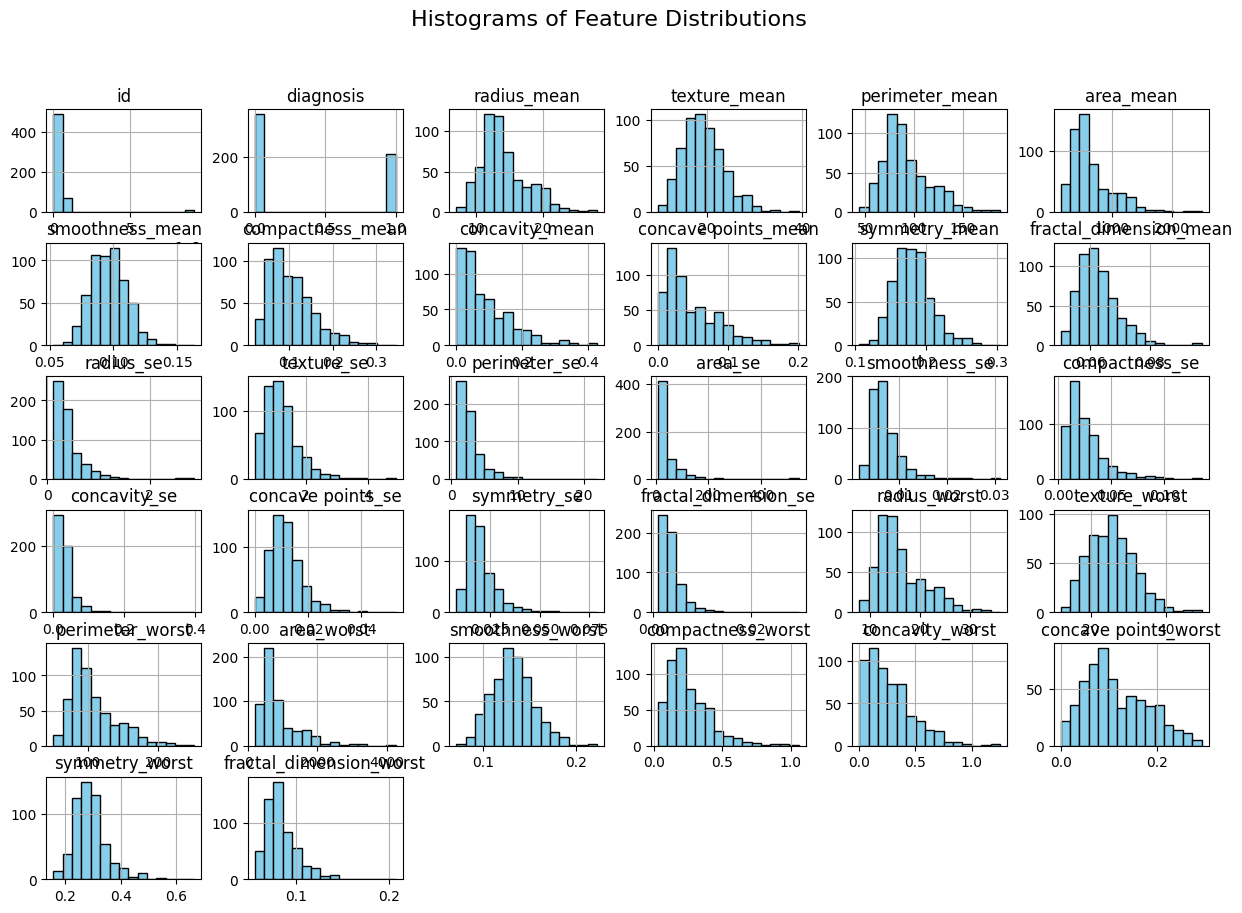

In [43]:
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Feature Distributions", fontsize=16)
plt.show()

Boxplots to detect outliers and compare distributions

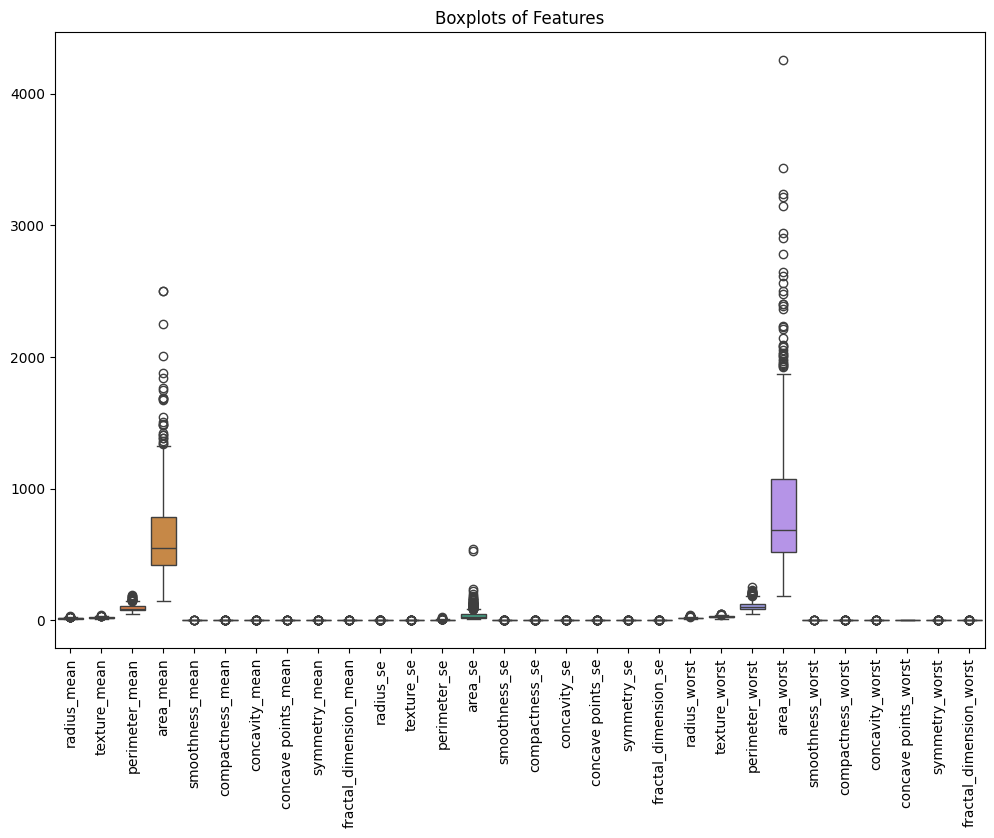

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=['id', 'diagnosis']))
plt.title("Boxplots of Features")
plt.xticks(rotation=90)
plt.show()

Correlation Heatmap to understand relationships between features

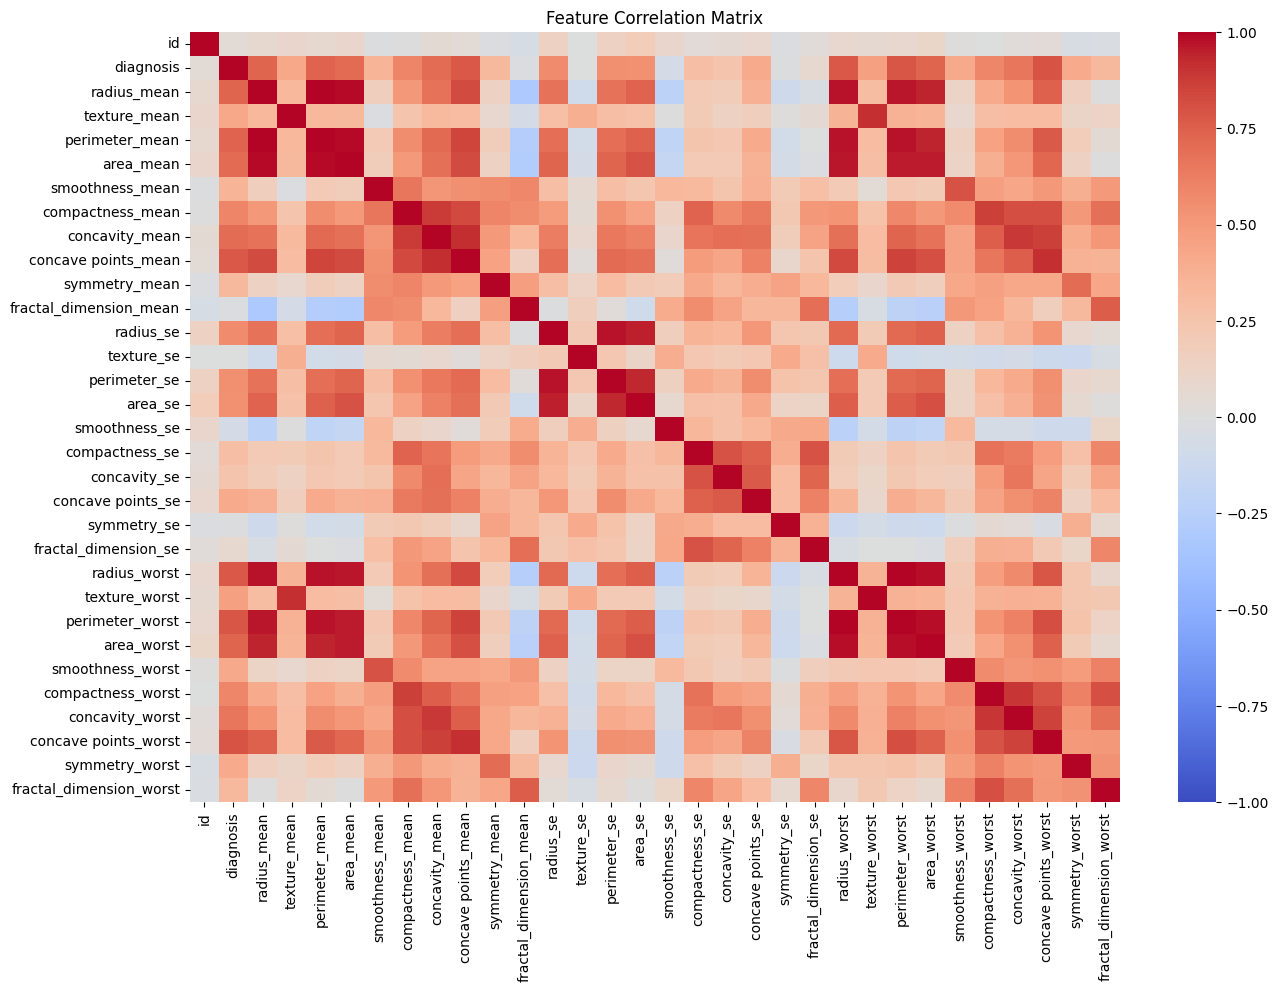

In [31]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()

Identify highly correlated pairs (absolute correlation > 0.8)

In [32]:
high_corr_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j])
                   for i in range(len(correlation_matrix.index))
                   for j in range(i+1, len(correlation_matrix.columns))
                   if abs(correlation_matrix.iloc[i, j]) > 0.8]

print("\nHighly Correlated Feature Pairs:")
print(high_corr_pairs)


Highly Correlated Feature Pairs:
[('radius_mean', 'perimeter_mean'), ('radius_mean', 'area_mean'), ('radius_mean', 'concave points_mean'), ('radius_mean', 'radius_worst'), ('radius_mean', 'perimeter_worst'), ('radius_mean', 'area_worst'), ('texture_mean', 'texture_worst'), ('perimeter_mean', 'area_mean'), ('perimeter_mean', 'concave points_mean'), ('perimeter_mean', 'radius_worst'), ('perimeter_mean', 'perimeter_worst'), ('perimeter_mean', 'area_worst'), ('area_mean', 'concave points_mean'), ('area_mean', 'area_se'), ('area_mean', 'radius_worst'), ('area_mean', 'perimeter_worst'), ('area_mean', 'area_worst'), ('smoothness_mean', 'smoothness_worst'), ('compactness_mean', 'concavity_mean'), ('compactness_mean', 'concave points_mean'), ('compactness_mean', 'compactness_worst'), ('compactness_mean', 'concavity_worst'), ('compactness_mean', 'concave points_worst'), ('concavity_mean', 'concave points_mean'), ('concavity_mean', 'concavity_worst'), ('concavity_mean', 'concave points_worst'), 

Pair Plot to visualize

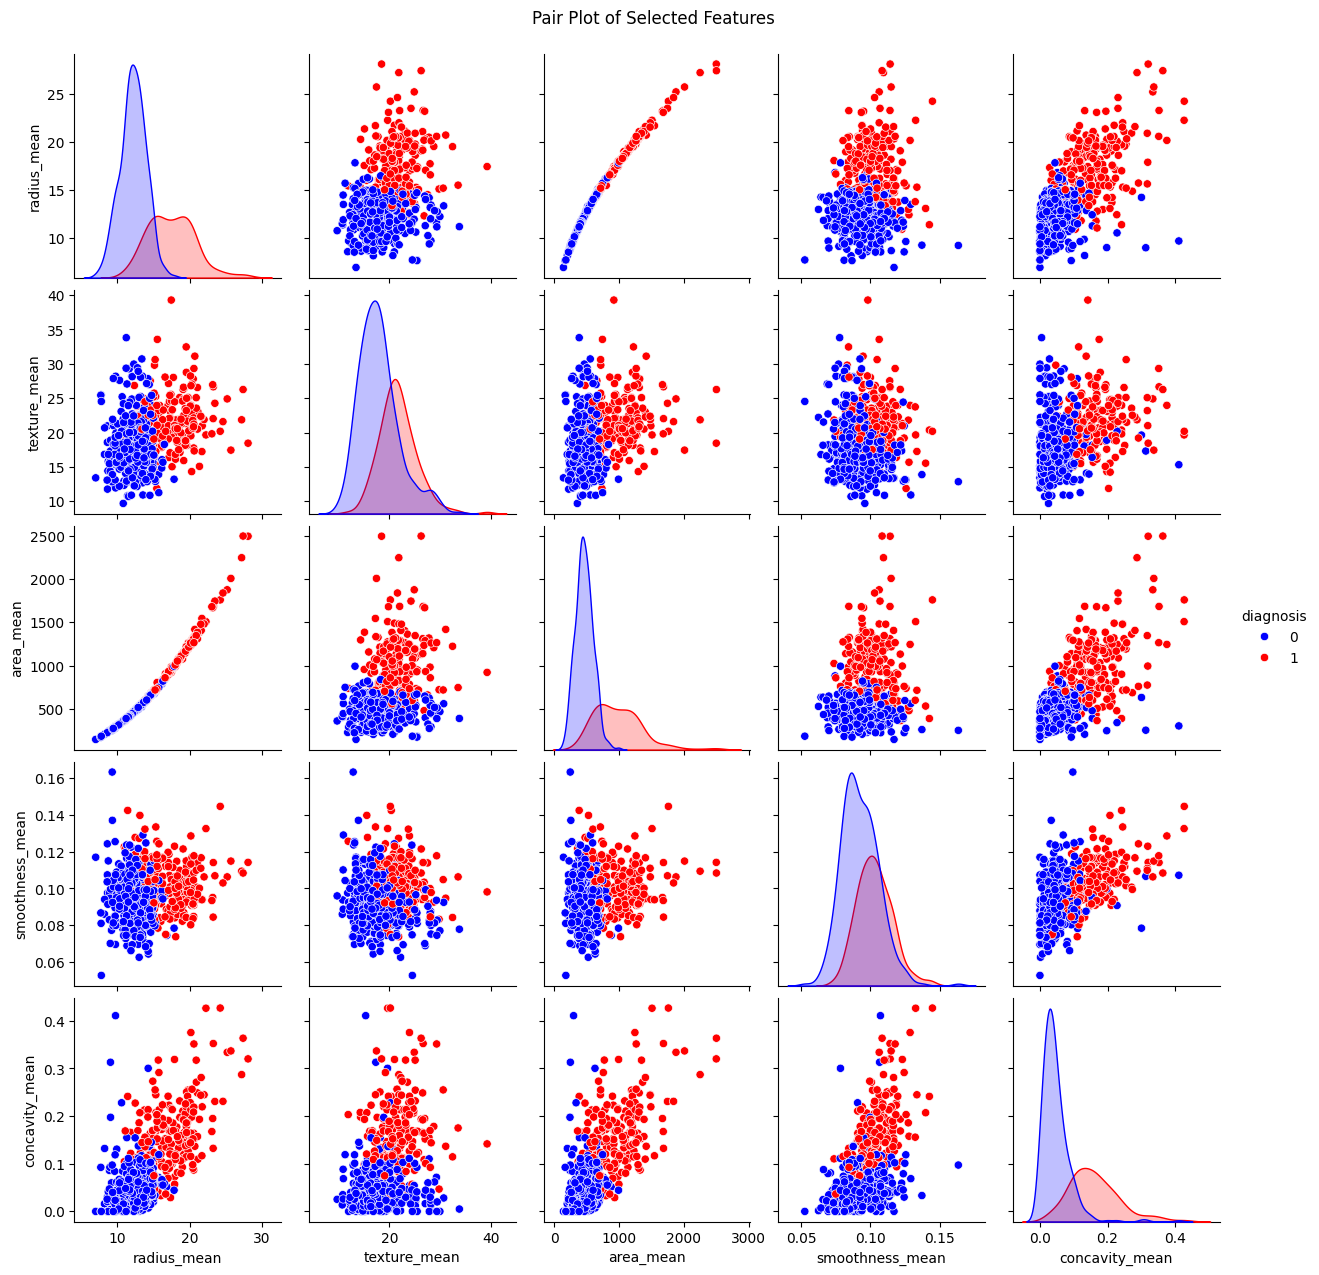

In [33]:
selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', palette={1: 'red', 0: 'blue'}, diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

## 5.Feature Engineering

Reduce to 10 principal components for example

In [34]:
pca = PCA(n_components=10) 
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio by Principal Components:")
print(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.cumsum())


Explained Variance Ratio by Principal Components:
[0.44140602 0.19056427 0.0944075  0.0655707  0.05511958 0.04037225
 0.02238306 0.0159329  0.01396761 0.01171086]
Cumulative Explained Variance: [0.44140602 0.63197028 0.72637778 0.79194848 0.84706806 0.8874403
 0.90982337 0.92575627 0.93972388 0.95143474]


Feature Selection with Random Forest

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importances.head(10))

top_features = feature_importances['feature'].head(10).tolist()
X_top_features = df[top_features]


Top 10 Important Features:
                 feature  importance
23            area_worst    0.144349
27  concave points_worst    0.139224
7    concave points_mean    0.096078
22       perimeter_worst    0.084963
20          radius_worst    0.081689
2         perimeter_mean    0.068346
6         concavity_mean    0.063987
3              area_mean    0.052312
0            radius_mean    0.038903
13               area_se    0.035601


## 6.Data Splitting

In [36]:
df_top_features = df[top_features + ['diagnosis']]
X = df_top_features.drop(columns=['diagnosis'])
y = df_top_features['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


## 7.Model Selection and Cross-Validation

In [37]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


print("Model Performance (Cross-Validation Accuracy):")
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Model Performance (Cross-Validation Accuracy):
Logistic Regression: 0.9736 ± 0.0113
Random Forest: 0.9559 ± 0.0220
Support Vector Machine: 0.9692 ± 0.0146
K-Nearest Neighbors: 0.9603 ± 0.0193


## 8.Model Training

Define hyperparameter grids for each model

In [38]:
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

Train and tune each model

In [39]:
best_models = {}
for model_name, params in param_grids.items():
    if model_name == "Logistic Regression":
        model = LogisticRegression(max_iter=1000)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(random_state=42)
    elif model_name == "Support Vector Machine":
        model = SVC(probability=True)
    elif model_name == "K-Nearest Neighbors":
        model = KNeighborsClassifier()

    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}


KeyboardInterrupt: 

## 9.Model Evaluation


Model Evaluation Metrics on Test Set:

Logistic Regression:
  Accuracy: 0.9825
  Precision: 1.0000
  Recall: 0.9524
  F1 Score: 0.9756
  AUC-ROC: 0.9980


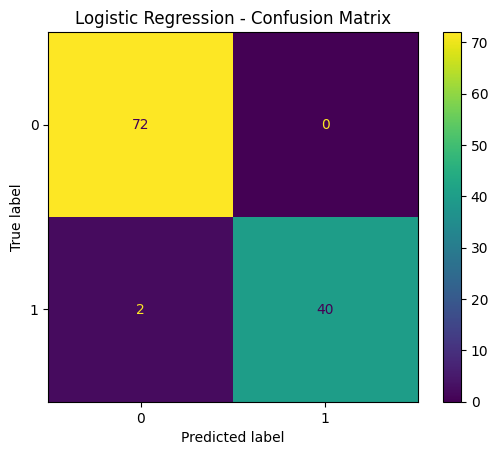


Random Forest:
  Accuracy: 0.9737
  Precision: 1.0000
  Recall: 0.9286
  F1 Score: 0.9630
  AUC-ROC: 0.9940


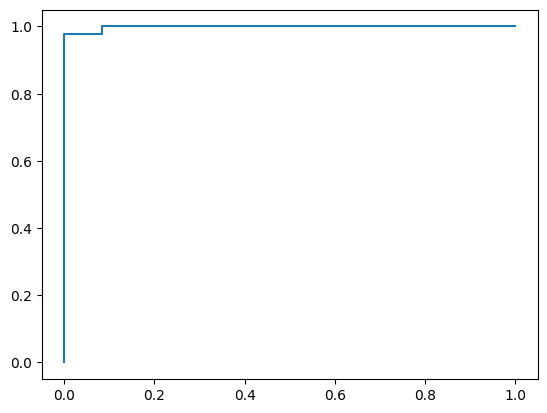

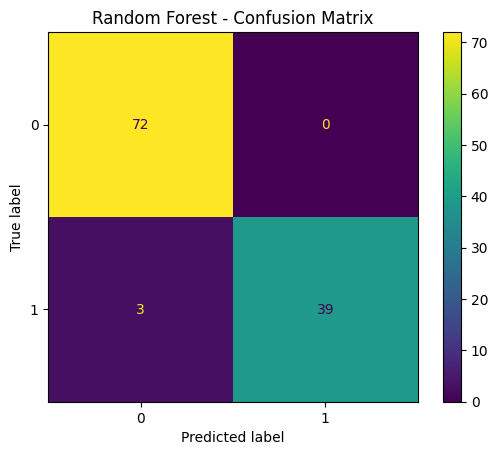


Support Vector Machine:
  Accuracy: 0.9737
  Precision: 1.0000
  Recall: 0.9286
  F1 Score: 0.9630
  AUC-ROC: 0.9950


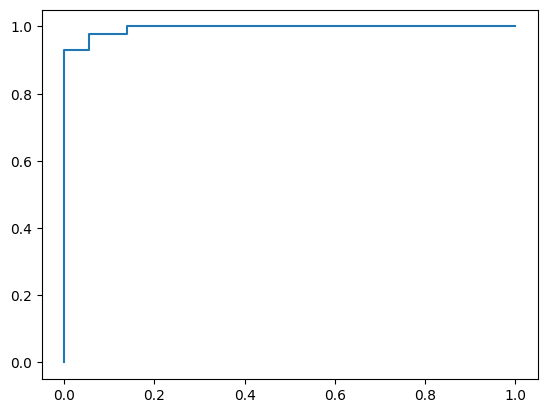

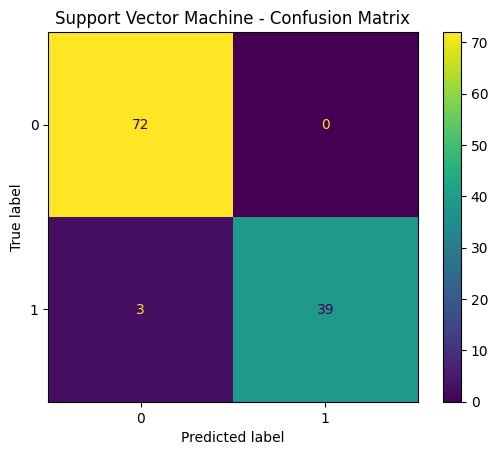


K-Nearest Neighbors:
  Accuracy: 0.9386
  Precision: 0.9730
  Recall: 0.8571
  F1 Score: 0.9114
  AUC-ROC: 0.9825


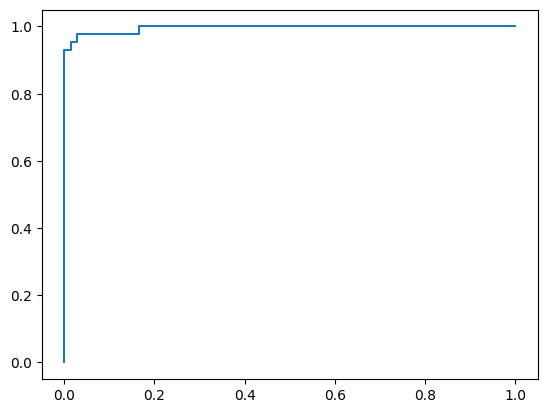

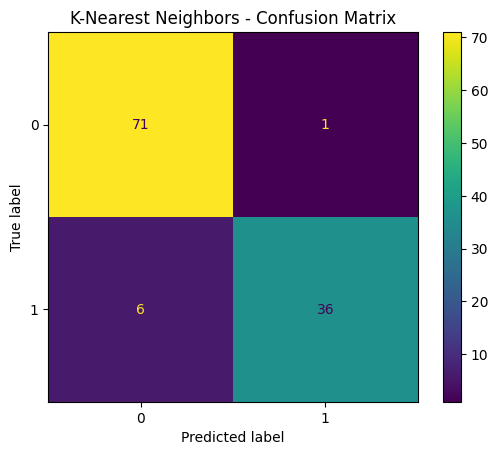

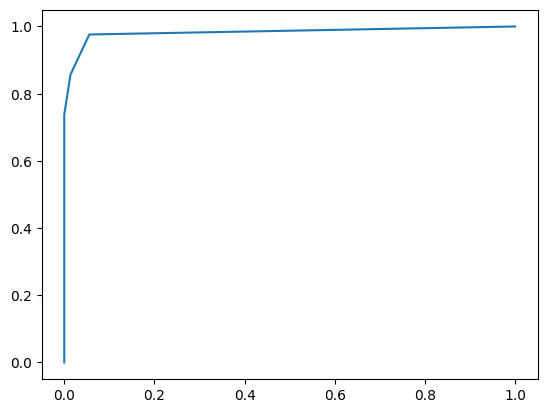

In [ ]:
print("\nModel Evaluation Metrics on Test Set:")
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"

    print(f"\n{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  AUC-ROC: {auc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")